# The Best Neighborhood in Pittsburgh Presentation
# Group 41

## Introduction
* Here is an analysis of our methodology for selecting the best neighborhoods in Pittsburgh. We assigned scores to each neighborhood based on its rank in the respective metric and then multiplied it by its corresponding weightage to obtain the overall score for the neighborhood. Finally, we ranked the neighborhoods based on their total scores to identify the top neighborhoods in Pittsburgh.

## Metrics 
* We used three metrics: number of incident, number of parks, and number of K-12 registrations. Among these, we considered security as the most crucial factor and assigned a weightage of 40% to it, and 30% to each of the other two factors.

## Datasets
* Number of Incidents: This datasets include the most recent initial crime incident data inluding the crime time, type, neighborhood location. We used incident number data as a proxy for safety, with the assumption that neighborhoods with lower incident rates are generally safer than those with higher incident rates.  
link: https://data.wprdc.org/dataset/police-incident-blotter

* Number of Parks: This dataset inlcudes the all the park location in pittsburgh neightborhoods.Parks play a crucial role in enhancing the quality of life in a neighborhood. They provide recreational spaces and facilities for residents, making them an important factor in determining the overall quality of a neighborhood.  
link: https://data.wprdc.org/dataset/parks

* K-12 Enrollment: This dataset inlclude all the k12 entrollments number in all neightborhoods. The number of K12 enrollments can reflect the educational resources available in each neighborhood. We assume that neighborhoods with more enrolled students have better or more schools. This is a crucial factor for students and their parents.  
link: https://data.wprdc.org/dataset/pittsburgh-public-schools-individualized-education-plan-iep

## Results
After assigning scores to and calculate according to the matrix.We can find the neightborhood with higher score means a overall better quanlity. it means a safer, relaxing and better education resource.

## Code

In [4]:
import pandas as pd
import numpy as np

education = pd.read_csv("education.csv")
incident_data = pd.read_csv("incidents.csv")
parks = pd.read_csv("parks.csv")

neighborhoods_k12 = pd.DataFrame(columns=['Neighborhood', 'K12 Enrollment'])

for i in range(len(education)):
    neighborhood_str = education.iloc[i]['neighborhoods']
    k12 = education.iloc[i]['total_enrollment_k_12']
    neighborhoods_list = neighborhood_str.split(', ')
    neighborhood = neighborhoods_list[0].strip()
    
    for neighborhood in neighborhoods_list:
        neighborhoods_k12.loc[len(neighborhoods_k12)] = [neighborhood, k12]

safety_weight = 0.4
k12_weight = 0.3
park_weight = 0.3

safety_ranking = incident_data["INCIDENTNEIGHBORHOOD"].value_counts().sort_values(ascending=True)
k12_ranking = neighborhoods_k12.groupby('Neighborhood')['K12 Enrollment'].sum().sort_values(ascending=False)
park_ranking = parks["neighborhood"].value_counts().sort_values(ascending=False)

# the "scores" is a normalized measure of the number of arrests/k12/parks in each neighborhood, which allows for comparison of neighborhoods.
neighborhood_scores = pd.DataFrame(index=safety_ranking.index)
neighborhood_scores["Safety_score"] = 100 * (safety_ranking.max() - safety_ranking) / (safety_ranking.max() - safety_ranking.min())
#It subtracts each neighborhood's incident count from the maximum incident count and then divides by the range (max - min) of incident counts. 
#This value is then multiplied by 100 to scale it.
neighborhood_scores["K12_score"] = 100 * (1 - ((k12_ranking.max() - k12_ranking) / (k12_ranking.max() - k12_ranking.min())))
#It subtracts each value from the maximum and then divides by the range. This ratio is subtracted from 1 to invert the scale (since higher enrollment is better), and then multiplied by 100.
neighborhood_scores["Park_score"] = 100 * (1 - ((park_ranking.max() - park_ranking) / (park_ranking.max() - park_ranking.min())))

neighborhood_scores["Total_score"] = (neighborhood_scores["Safety_score"] * safety_weight
                                       + neighborhood_scores["K12_score"] * k12_weight
                                       + neighborhood_scores["Park_score"] * park_weight)

best_neighborhoods = neighborhood_scores.sort_values("Total_score", ascending=False)
top5 = best_neighborhoods.iloc[:5]
print(top5)

# Export csv file
best_neighborhoods = best_neighborhoods.reset_index()
best_neighborhoods.columns = ["Neighborhood", "Safety_score", "K12_score", "Park_score", "Total_score"]
best_neighborhoods.to_csv("best.csv", index=False)

                      Safety_score  K12_score  Park_score  Total_score
INCIDENTNEIGHBORHOOD                                                  
East Liberty             81.100478  50.762712  100.000000    77.669005
Beechview                86.842105  54.322034   63.636364    70.124361
Squirrel Hill South      86.124402  54.406780   45.454545    64.408158
Carrick                  76.076555  93.474576   18.181818    63.927540
Brookline                82.057416  85.000000   18.181818    63.777512


## Map
* The following map shows the distribution of top 5 neighborhoods in Pittsburgh.

<Axes: >

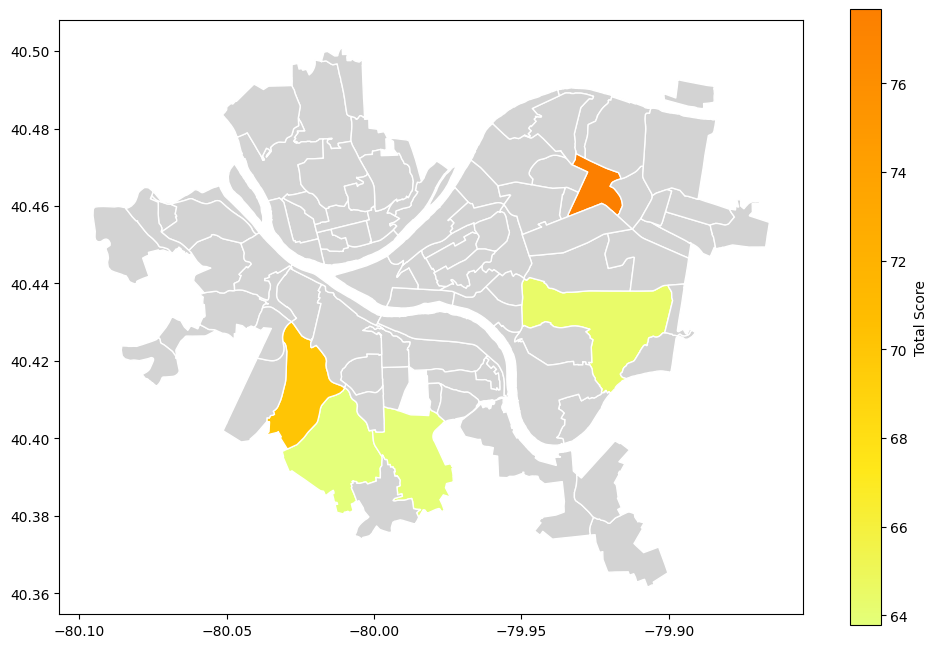

In [6]:
import geopandas

neighborhoods = geopandas.read_file("neighborhoods/neighborhoods.shp")
# do the merge
best_neighborhood_map = neighborhoods.merge(top5, how='left', left_on='hood', right_index=True)
# look at the head to confirm it merged correctly
best_neighborhood_map[['hood','Total_score','geometry']].head()

best_neighborhood_map.plot(column='Total_score', # set the data to be used for coloring
               cmap='Wistia',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Total Score"}, # label the legend
               figsize=(12, 8),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )

## Conclusion
Based on the total score, we determined that East Liberty is the best neighborhood in Pittsburgh according to our criteria. This is because it has the highest number of parks in Pittsburgh. However, if safety or education level is considered to be more significant, then Beechview and Squirrel Hill South are better options.

I